<h1><center>K-Nearest Neighbors</center></h1>
by <b>Shivam Sharma</b>

In this Library I have used the Iris data set to and Using K- Nearest Neighbours predicted the class label of Flower.

<h4><p>Importing libraries:
Numpy,Pandas,Matpltlib.pyplot</p> </h4>
 <i> note : We will also import Sklearn later in the code</i>

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
from sklearn import preprocessing 

### Loading the data set

In [2]:
url = '/home/alpha/PycharmProjects/REgression/iris.data'
lst_name = ['Sepal Length(cm)', 'Sepal Width(cm)', 'Petal Length(cm)', 'Petal Width(cm)','Class']
data = pd.read_csv(url, names= lst_name,)

In [3]:
data.head() # Data is a Pandas data frame
#To check use : print(type(data))

,Sepal Length(cm),Sepal Width(cm),Petal Length(cm),Petal Width(cm),Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Our data set has 5 columns, 4 of which contain numerical data but the label 'class' contains Categorical data 

In [4]:
X = data[['Sepal Length(cm)', 'Sepal Width(cm)', 'Petal Length(cm)', 'Petal Width(cm)']].values.astype(float)

print(np.shape(X),type(X))
#Storing The numerical data of first 4 columns into X {Sepal Length(cm), Sepal Width(cm), Petal Length(cm), Petal Width(cm)}

(150, 4) <class 'numpy.ndarray'>


## Converting Categorical Data to Numerical Data.

In [5]:
Y = data['Class']
Y = Y.map({'Iris-setosa':1,'Iris-versicolor':2,'Iris-virginica':3}) # Y is Pandas Data Frame. 

In [6]:
Y = Y.values # Converting Data Frame to Array
Y #Shape of Y (150,)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

# Data Preprocessing
Data Standardization give data zero mean and unit variance, it is good practice, especially for algorithms such as 
<b>KNN</b> which is based on distance of cases.

The data is normalised i.e. centered and scaled calculated the mean and standard deviation and then the values are normalised according to them.
<i>It helps in ranging data such that one value doesnot lead to malfunction of the classifier i.e. Knearest in present case</i>

In [7]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5] # We use array indexing because we are now working with Numpy array

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673]])

<h2>Out of Sample Accuracy</h2> is the percentage of correct predictions that the model makes on data that that the model has NOT been trained on. Doing a train and test on the same dataset will most likely have low out-of-sample accuracy, due to the likelihood of being over-fit.
It is important that our models have a high, out-of-sample accuracy, because the purpose of any model, of course, is to make correct predictions on unknown data


## Train Test Split
 One way is to use an evaluation approach called Train/Test Split.
Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set. 

This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the data. It is more realistic for real world problems.


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 4) # Test size gives the percenrage of data which will be kept for testing. 

In [9]:
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape) # Out of sample data.

Train set: (120, 4) (120,)
Test set: (30, 4) (30,)


Let us now Train our model.


In [10]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors= 5) # Value of K = 5 i.e. 5 nearest neighbours will be seeked.
clf # this is our classifier with specified parameters

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [11]:
Model_1 = clf.fit(X_train,Y_train)
Model_1

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

## Our Model is perpared for predictions

In [12]:
Y_hat = Model_1.predict(X_test)
Y_hat[0:5]

array([3, 1, 3, 3, 3])

### Accuracy evaluation
In multilabel classification, __accuracy classification score__ is a function that computes subset accuracy. This function is equal to the jaccard_similarity_score function. Essentially, it calculates how closely the actual labels and predicted labels are matched in the test set.

In [13]:
from sklearn import metrics
print("In sample/ Train set Accuracy: ", metrics.accuracy_score(Y_train, Model_1.predict(X_train)))
print("Out of sample/ Test set Accuracy: ", metrics.accuracy_score(Y_test, Y_hat))

In sample/ Train set Accuracy:  0.9666666666666667
Out of sample/ Test set Accuracy:  0.9333333333333333


Well we have predicted the class labels on the test set and got the accuracy to be : 0.933.
But what about other values of k
There may be a value of k for which we can get better accuracy.

Let's check it out.

In [14]:
def k_model_acc(K):
    mean_acc = np.zeros((K))
    
    for n in range(1,K+1):
        #Train Model and Predict  
        Model = KNeighborsClassifier(n_neighbors = n).fit(X_train,Y_train)
        y_hat=Model.predict(X_test)
        mean_acc[n-1] = metrics.accuracy_score(Y_test, y_hat)

    return mean_acc


def acc_show(K,mean_acc):
    plt.plot(range(1,K+1),mean_acc,'r')
    plt.legend(('Accuracy '))
    plt.ylabel('Accuracy ')
    plt.xlabel('Number of Neighbours (K)')
    plt.show()

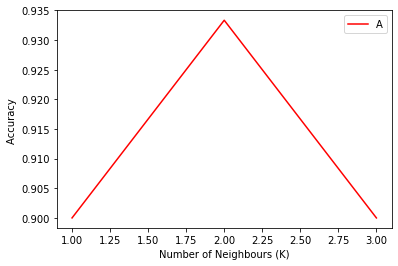

In [15]:
k = int(input("Enter the max value of k = "))
p = k_model_acc(k) 
acc_show(k,p)

In [16]:
print( "The best accuracy was with", p.max(), "with k=", p.argmax()+1) 

The best accuracy was with 0.9333333333333333 with k= 2


Thus we have best out of sample accuracy as 0.933 for K = 2.
